<a href="https://colab.research.google.com/github/SeungHyunKee/MS-ai-school/blob/main/Day6_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀(Linear Regression)


In [1]:
# 보스턴 집값 예측
from sklearn.datasets import load_boston

boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 독립변수
- CRIM : 범죄율
- INDUS : 비소매상업지역 면적비율
- NOX : 일산화질수 농도
- RM : 주택당 방 수
- LSTAT : 하위 계층 비율
- B : 흑인 비율
- PTRATIO : 학생과 선생님 비율
- ZN : 25,000평방 피트를 초과 거주지역 비율
- CHAS : 찰스강의 경계에 위치하면 1 아니면 0
- AGE : 1940년 이전에 건축된 주택의 비율
- RAD : 방사형 고속도로까지의 거리
- DIS : 직업센터의 거리
- TAX : 재산세율
### 종속변수
- 보스턴 506개 타운의 1978년 주택 가격 중앙값(단위 1,000달러)

In [13]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy =  pd.DataFrame(boston.target, columns=['MEDV'])

In [7]:
# df 1로 합쳐주기 
df = pd.concat([dfX,dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


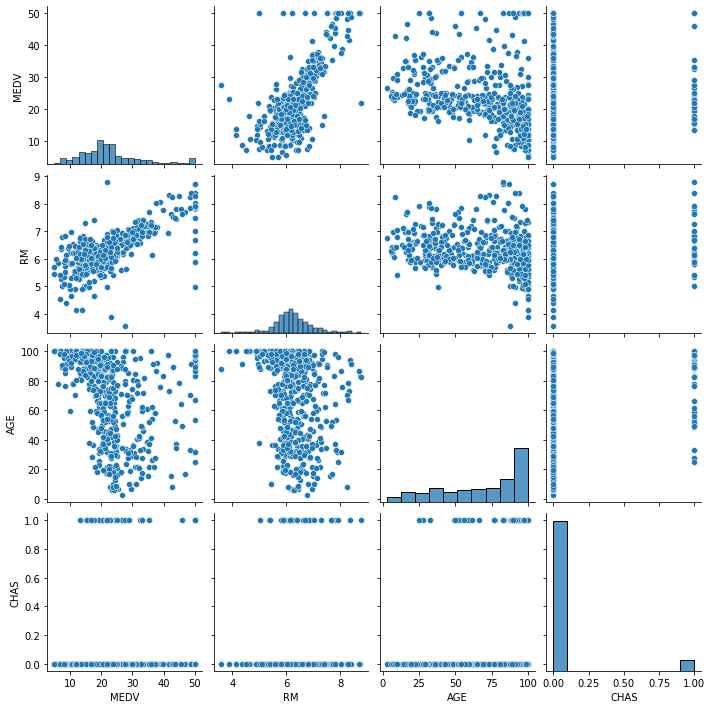

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['MEDV','RM','AGE','CHAS']])
plt.show()

In [9]:
# 당뇨병 진행도 예측
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

# 결과값을보면 어떤 값으로 스케일링 되어있음을 볼수있다

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


[]

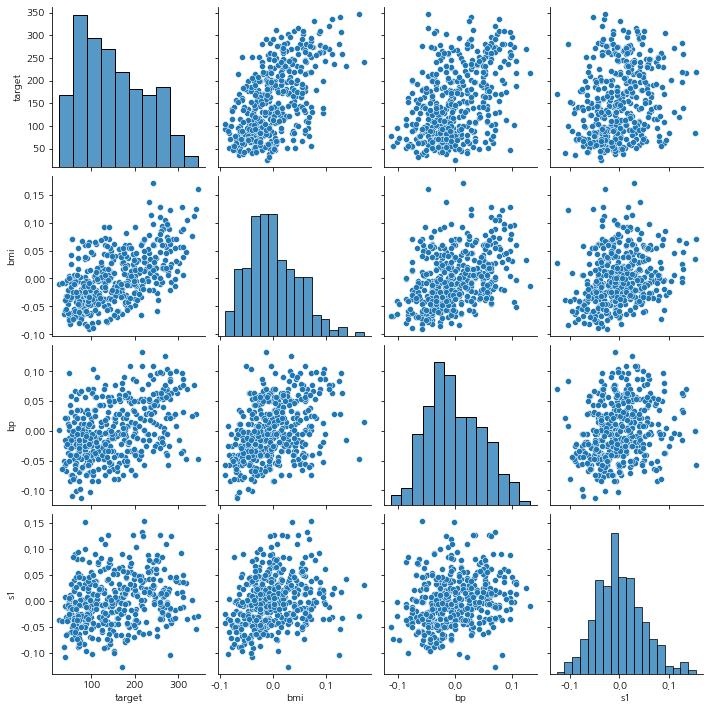

In [15]:
# target = 진행정도
sns.pairplot(df[['target','bmi','bp','s1']])
plt.plot()

In [16]:
# 가상으로 데이터 만들기
# 가상 데이터 예측
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)
# X  # x,y,z각각은 50개의 데이터

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

y = wx + b + e

In [17]:
# 각각의 데이터 보?기
import numpy as np
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100


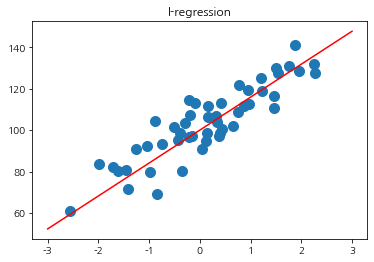

In [18]:
plt.plot(xx, y0,'r')
plt.scatter(X, y, s=100)
plt.title('l-regression')
plt.show()

# 어떤 하나의 y값을 찾는게 최종 목적

## 선형회귀 분석 기초

$$\hat{y} = f(x)$$
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$$
$$= w_0+w^Tx$$

### 최소자승법
y와 $\hat{y}$이 가까워 지려면 OLS(Oridnary Least Squares) 방법을 통해 RSS(Residual Sum of Squares)를 최소화시키는 것과 같다.

$$\hat{y} = Xw$$   
$$ϵ=y-\hat{y} =y - Xw$$   
$$RSS = ϵ^Tϵ=(y - Xw)^T(y - Xw)$$   
$$ = y^T-2y^TXw + w^TX^TXw$$

w로 미분하여 잔차제곱합의 그레디언트 벡터를 구합니다.
잔차가 최소가 그레디언트 벡터가 0이어야 합니다.
$$\frac{dRSS}{dw} = 0$$   
$$\frac{dRSS}{dw} = -2X^Ty + 2X^TXw$$   
$$X^Ty = X^TXw$$   
$$w=(X^TX)^{-1}X^Ty$$

즉, 0이 되는 w값을 찾기



### 직교 방정식
그레디언트 벡터가 0벡터가 되는 관계를 직교방정식
$$X^Ty - X^TXw = 0$$
$$X^T(y-Xw) = 0$$
$$X^Te = 0$$

- 직교 방정식의 성질
      잔차 벡터의 원소의 합은 0
$$\Sigma_{i=0}^Ne_i=0$$

      x 데이터의 평균값에 대한 예측값은 y 데이터의 평균값이다.


In [19]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)

In [20]:
w

array(86.44794301)

In [21]:
# OLS 해 구하기
w = np.linalg.inv(X.T @ X) @ X.T@y
w

array([[99.79150869],
       [86.96171201]])

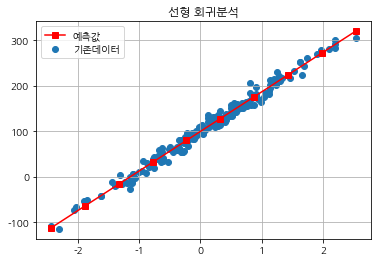

In [22]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label='기존데이터')
plt.plot(x_new, y_new, 'rs-', label='예측값')
plt.title('선형 회귀분석')
plt.legend()
plt.grid()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0,y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [24]:
model.predict([[-2],[-1],[0],[1],[2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

#### statsmodel을 활용

In [25]:
df = pd.DataFrame({'x':X0[:,0], 'y':y[:,0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [26]:
dfy = df[['y']]
dfX = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfX)
result = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          8.17e-182
Time:                        05:32:26   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.000      98.402     101.181
x             86.9617      0.769    113.058      0.000      85.445      88.479
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.059
Skew:                           0.121   Prob(JB):                        0.589
Kurtosis:                       3.262   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
dfy = df[['y']]
dfX = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfX)
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
model = sm.OLS.from_formula("y ~ x",data=df)   # y~x =  왼쪽엔 종속변수, 오른쪽엔 독립변수 넣어주기
result = model.fit()

In [30]:
result.predict({'x':[1000,2000]})

0     87061.503522
1    174023.215535
dtype: float64

In [31]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

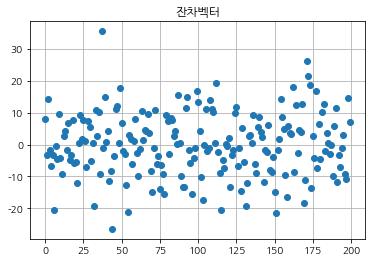

In [32]:
result.resid.plot(style='o')
plt.grid()
plt.title('잔차벡터')
plt.show()

In [34]:
result.resid.sum()
# 직교방정식이므로 합이 0이 나와야됨. 결과값을보면 -12승이니 대충 0에 가까운걸 볼수잇ㅇ음

6.036060540282051e-12

In [35]:
result.predict({'x':X0.mean()})

0    109.069351
dtype: float64

In [37]:
y.mean()  # 바로위의 predict값과 동일한걸 확인할수있음

109.06935068170775

## 보스턴 집값 예측

In [38]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
dfX = sm.add_constant(dfX0)

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        05:44:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
A = np.eye(4)
np.linalg.cond(A)

1.0

In [40]:
b = np.ones(4)
x = np.linalg.solve(A,b)

In [41]:
x

array([1., 1., 1., 1.])

In [42]:
x_error = np.linalg.solve(A + 0.0001 * np.eye(4), b)

In [43]:
x_error

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [44]:
import scipy as sp
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [45]:
np.linalg.cond(A)

15513.73873892924

In [46]:
sp.linalg.solve(A,b)

array([  -4.,   60., -180.,  140.])

In [47]:
sp.linalg.solve(A + 0.0001*np.eye(4), b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

In [48]:
dfX.describe().loc['std']

const        0.000000
CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [49]:
dfX2 = dfX.copy()
dfX2['TAX'] *= 1e13
df = pd.concat([dfX2, dfy], axis=1)
model2 = sm.OLS.from_formula('MEDV ~ ' + '+'.join(boston.feature_names),data=df)
result2 = model2.fit()
print(result2.summary())

# R-squared : 성능지표

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.42
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           8.42e-44
Time:                        06:32:27   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.554      0.0

In [50]:
# 이걸 더 쉽게 모델링 해주기

feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = [f'scale({name})' for name in feature_names] + ['CHAS']
model3 = sm.OLS.from_formula('MEDV ~ ' + "+".join(feature_names),data= df)

# CHAS = 카테고리 변수

In [52]:
# '+'.join(feature_names)
def sample(x):
  return x**2

eval('sample(3)')

9

In [51]:
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        06:36:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.